# Road Lane Detection with Computer Vision

- OpenCV
- Frame Masking
- Hough Line Tranformations
- GTA Game Data Collection
- Real World Driving Data Collection

Importing needed libraries

In [1]:
import numpy as np
import cv2
import os
import math

from moviepy.editor import VideoFileClip

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Processing pipline with single frame

- Edge detection is problematic with gta video capture

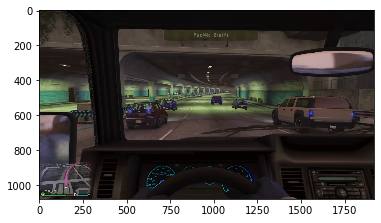

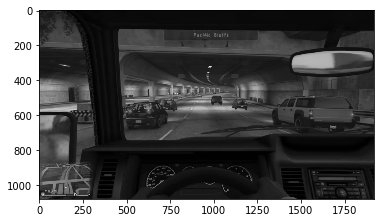

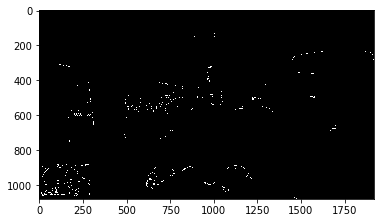

In [4]:
video = cv2.VideoCapture('data/gta_fp_day_highway_car.mp4')

# Every time this is called displays the next frame untill the video is released
ret, frame = video.read()

if ret:
    # Original Image import
    plt.imshow(frame)
    plt.show()

    # Gray and Gaussian Blur Filter
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    plt.imshow(blur, cmap='gray')
    plt.show()

    # Canny Edge Filter
    frame = cv2.Canny(blur, 100, 200)
    plt.imshow(frame, cmap='gray')
    plt.show()

# Realeses the video loop
video.release()

### Processing video as a whole

In [37]:
def proccess_img(original_image):
    # Processing to Grayscale (simpiler data)
    processed_img = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    # Adding Gaussian Blur
    # processed_img = cv2.GaussianBlur(processed_img, (5, 5), 0)
    # Applying Canny edge detection (threshold values will have to be tweaked)
    processed_img = cv2.Canny(processed_img, threshold1=100, threshold2=200)
    return processed_img

**Video Playback**

In [38]:
# Importing the video
video = cv2.VideoCapture('data/1.mov')

# Checking if video opened
if video.isOpened() == False:
    print('Error opening video file')

while video.isOpened():

    ret, frame = video.read()
    if ret:
        # Resizing image
        scale_percent = 40 # percent of original size
        width = int(frame.shape[1] * scale_percent / 100)
        height = int(frame.shape[0] * scale_percent / 100)
        dim = (width, height)
        frame = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)

        # Processing the current frame
        processed_frame = proccess_img(frame)
        cv2.imshow('Frame', processed_frame)

        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    # Break the loop
    else:
        break
   
video.release()
   
# Closes all the frames
cv2.destroyAllWindows()